In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from overview import load_bank_variables

pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.expand_frame_repr', False)  # Disable line wrapping
pd.set_option('display.max_rows', None)  # Show all rows


## Loading Data 

In [2]:
bank_df = pd.read_csv("bank.csv")
df = bank_df.copy()

In [3]:
load_bank_variables()

,Variable Name,Description
0,age,Age
1,job,"Type of job (e.g., 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"Marital status (e.g., 'divorced','married','single','unknown'; 'divorced' means divorced or widowed)"
3,education,"Education level (e.g., 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,Has credit in default?
5,balance,Average yearly balance (euros)
6,housing,Has housing loan?
7,loan,Has personal loan?
8,contact,"Contact communication type (e.g., 'cellular','telephone')"
9,day_of_week,Last contact day of the week


## Data Exploration

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


the dataset countains 2000 rows and 17 columns both numerical and categorical  

    - numerical : age , balance , duration , compaign , pdays , previous 
    - categorical: job , marital , education , default , housing , loan , contact , month , poutcome , subscribed 


there is some missing values in : 

    - age (12)
    - job (10)
    - education (104)
    - contact (191)
    - poutcome (454)


<Axes: >

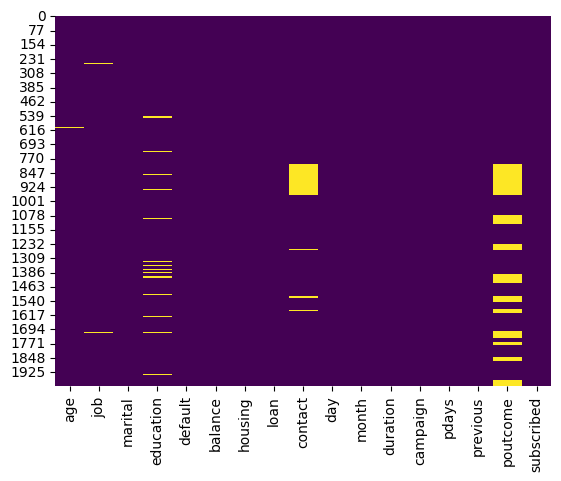

In [7]:
# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## stats of numerical column 

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


## seperate columns by type to plot each

In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

## plotting numerical columns

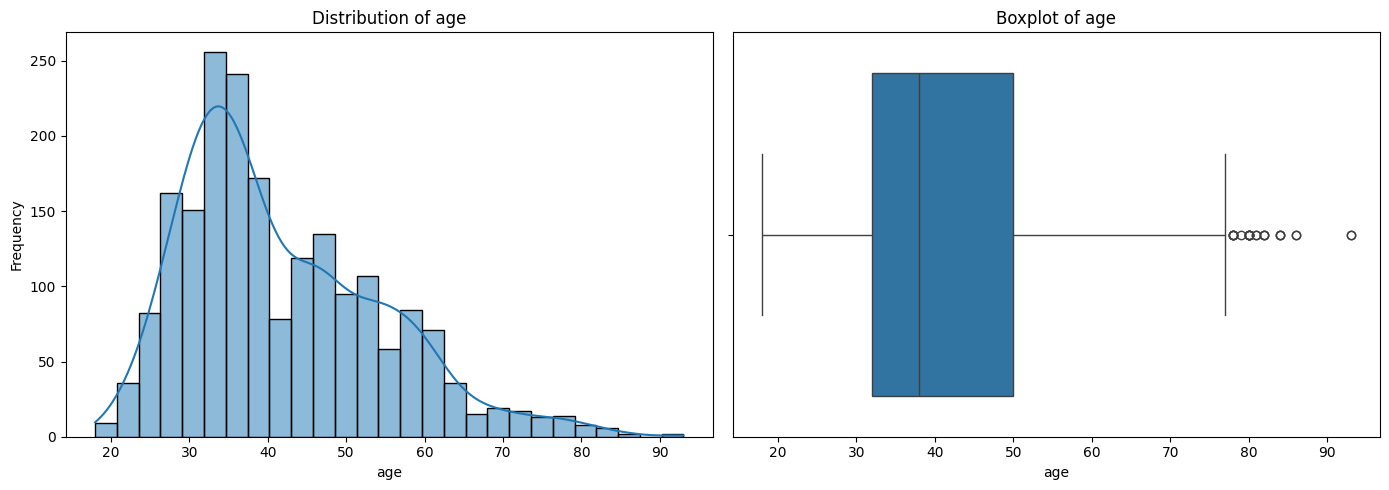

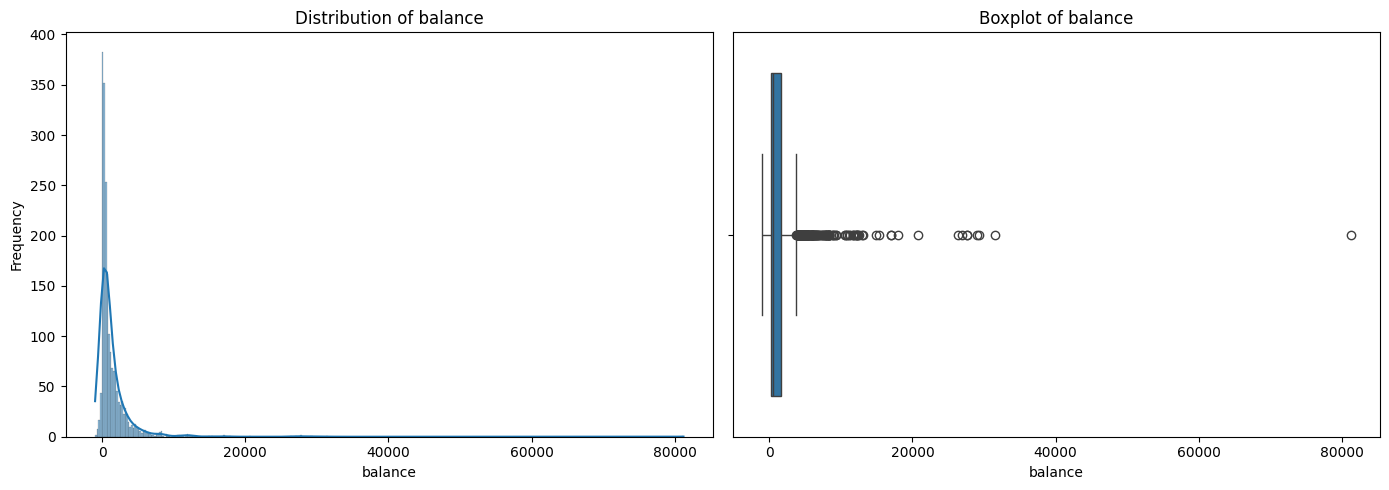

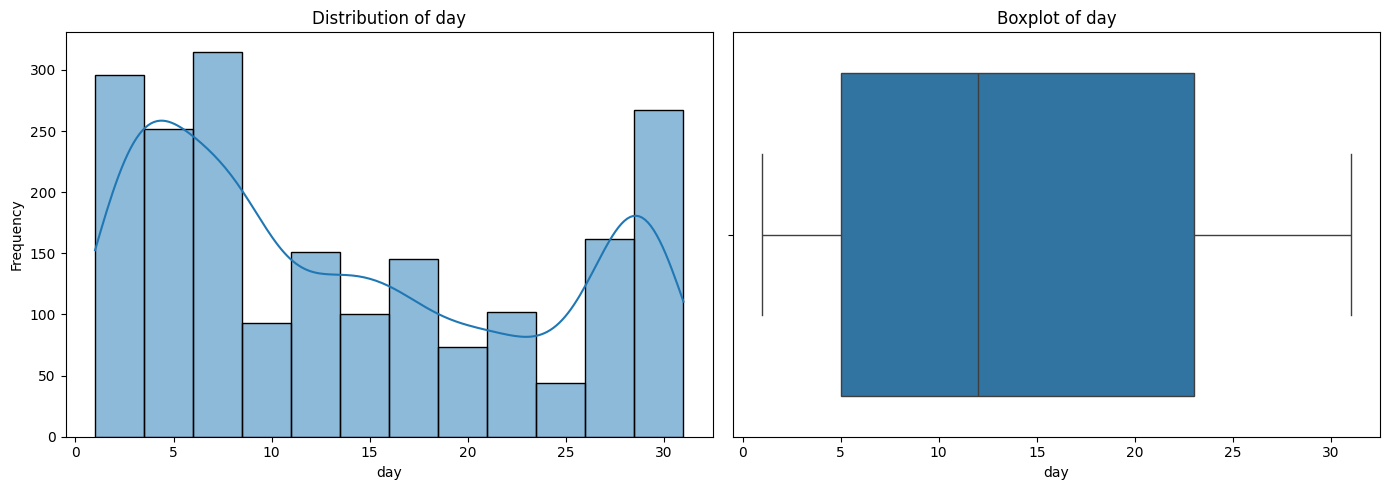

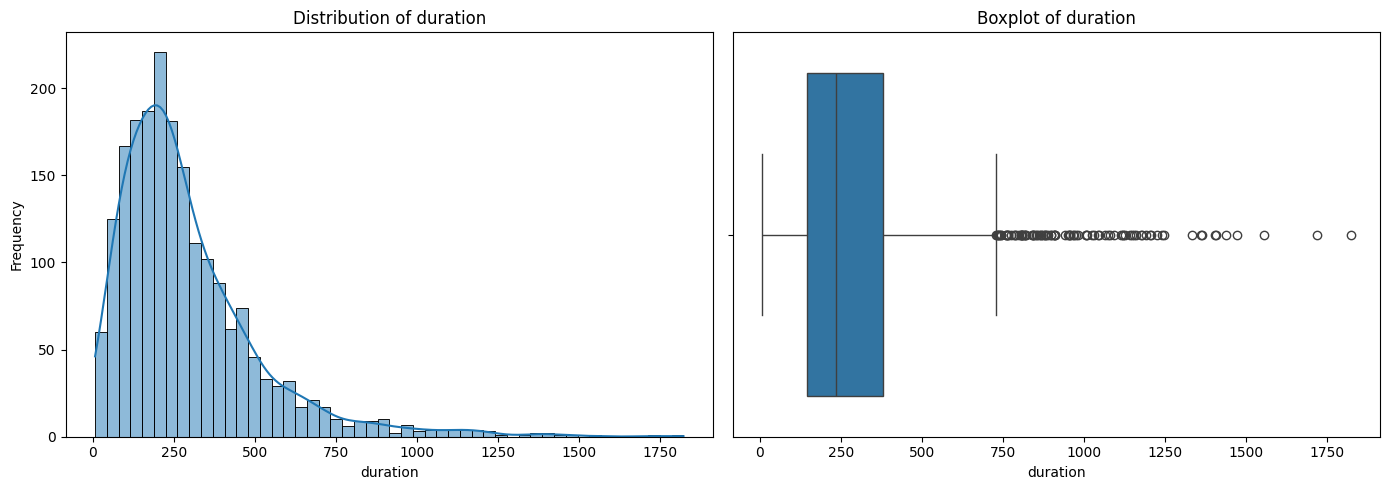

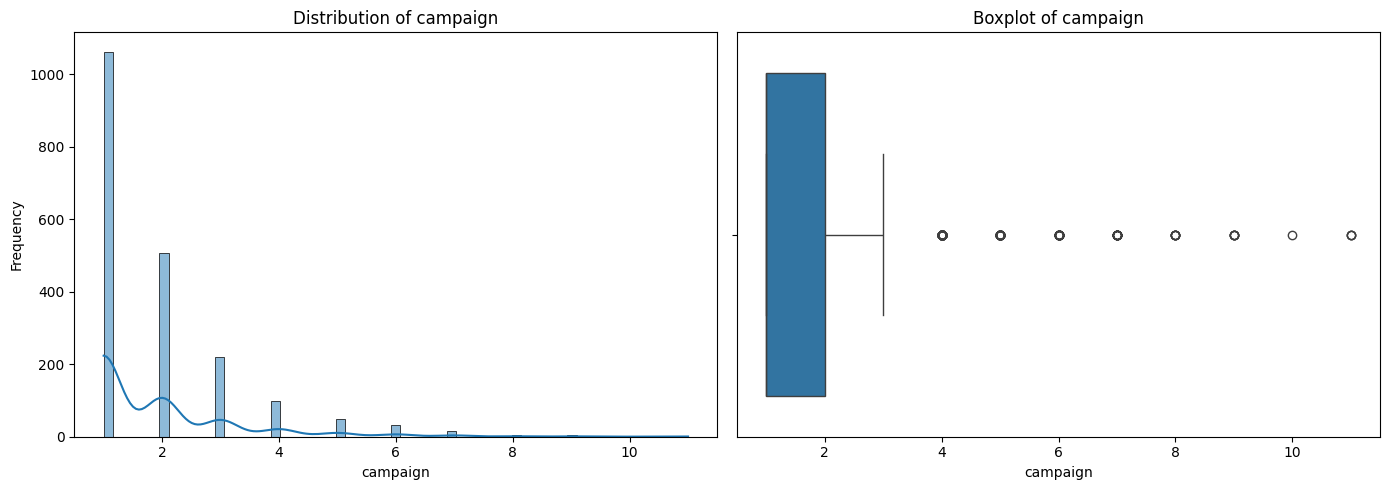

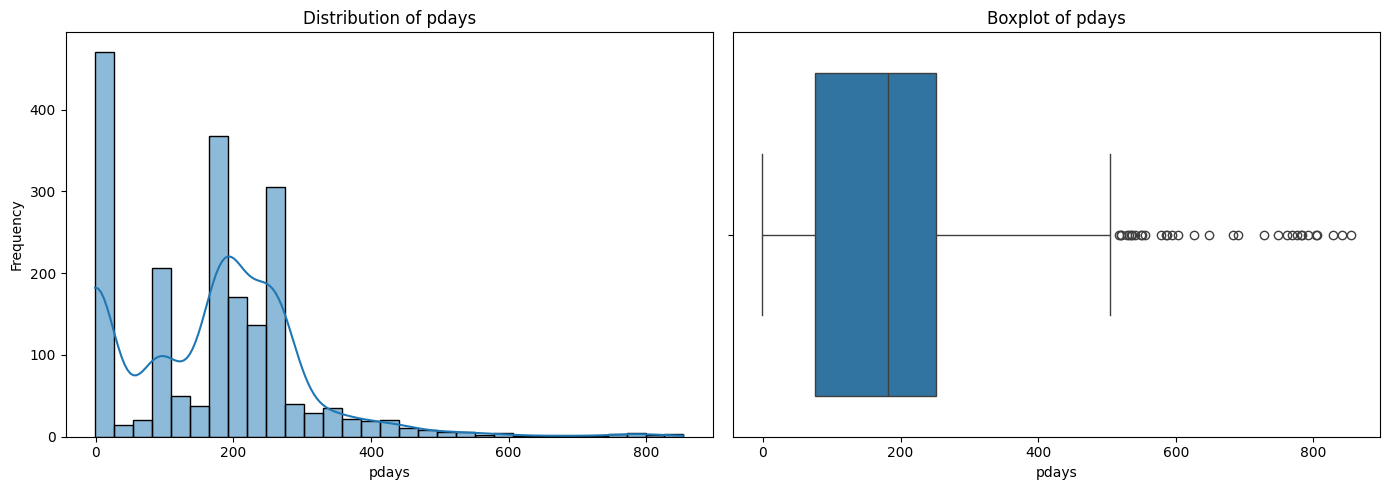

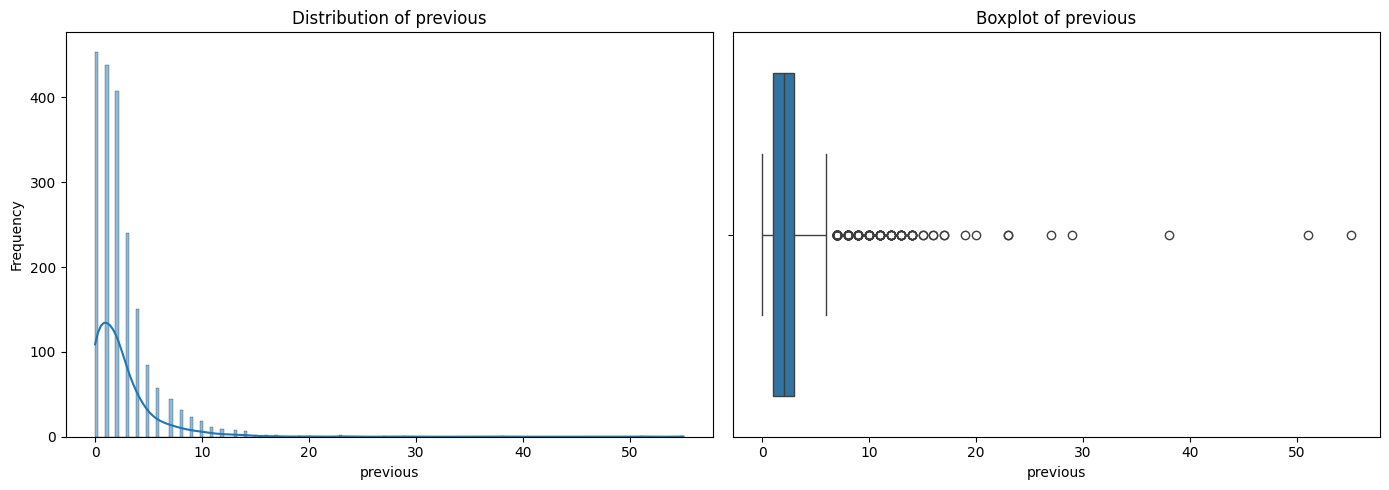

In [10]:
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

    # Distribution Plot
    sns.histplot(df[column].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

## plotting categorical columns

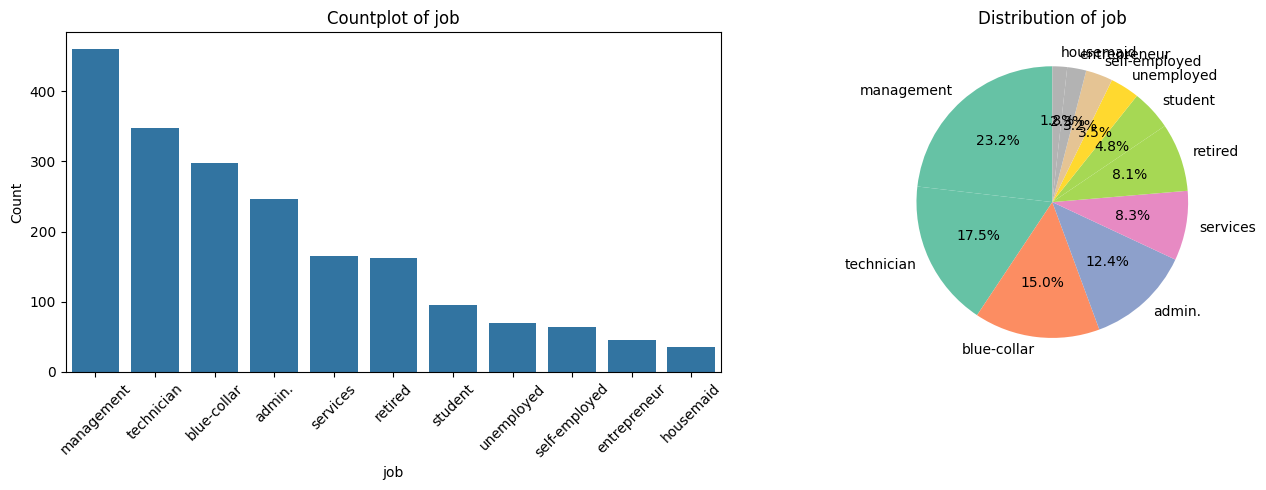

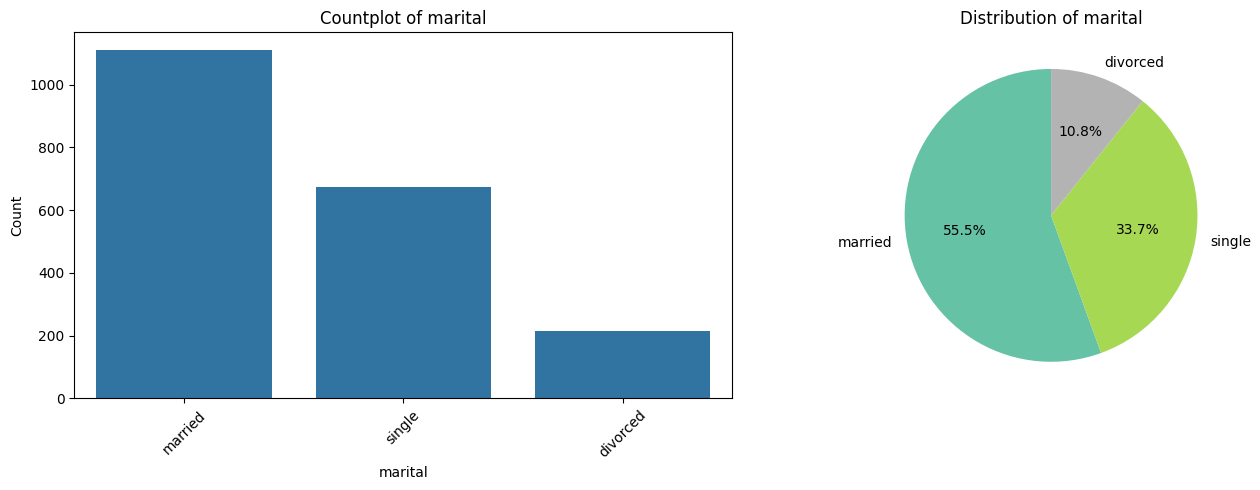

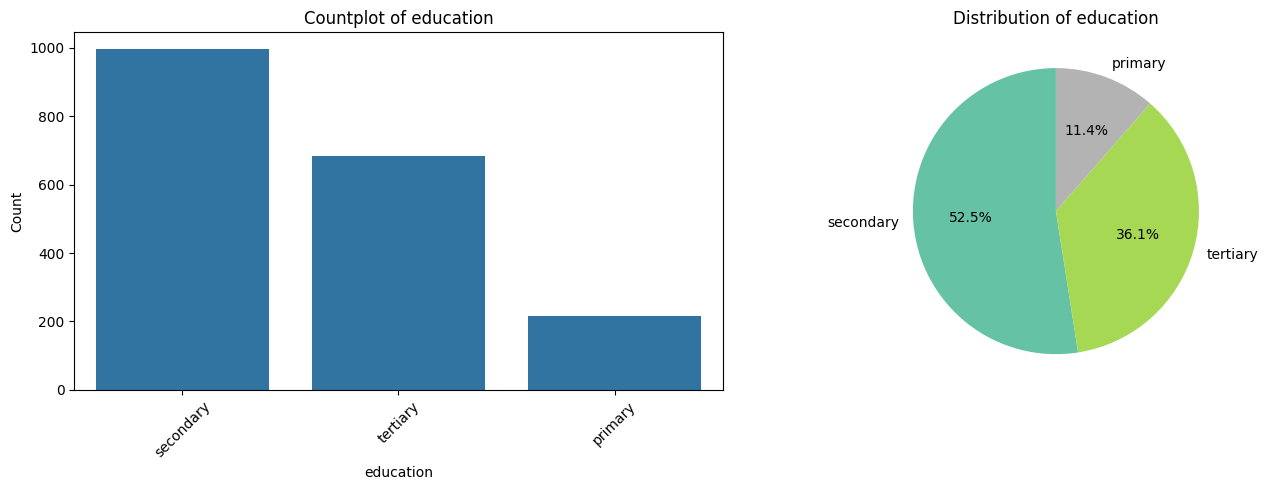

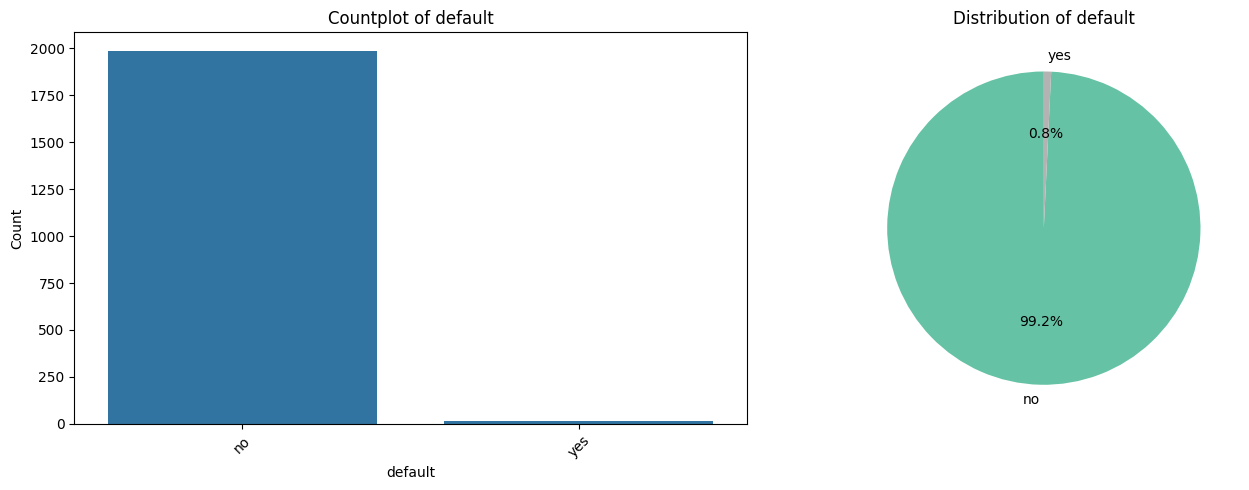

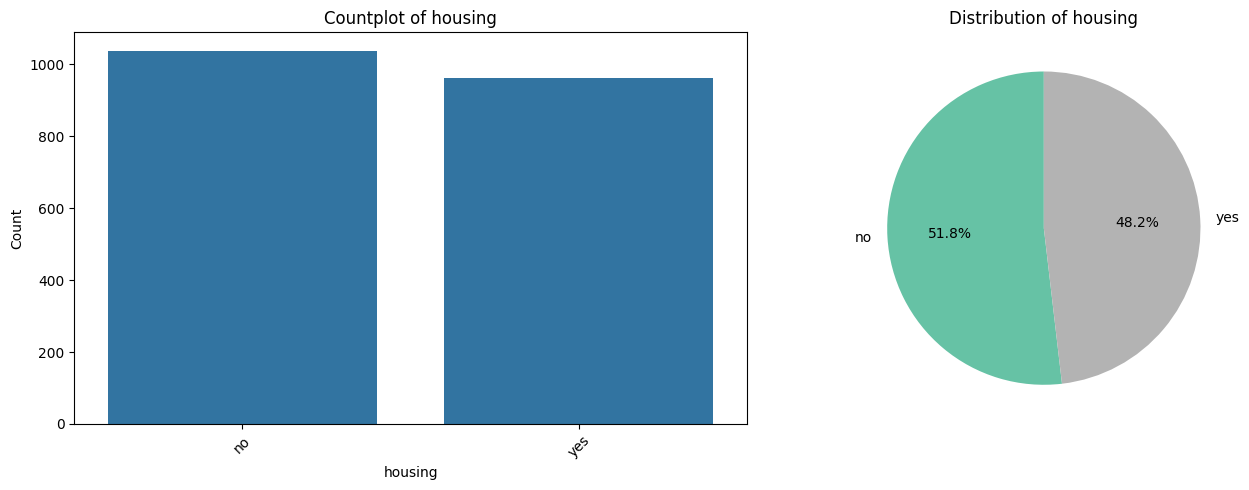

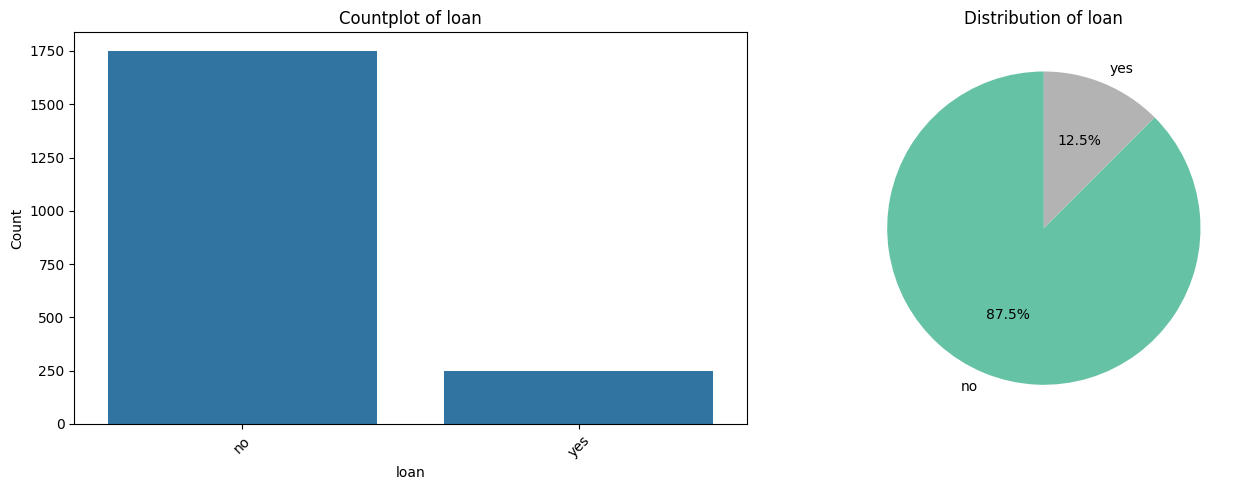

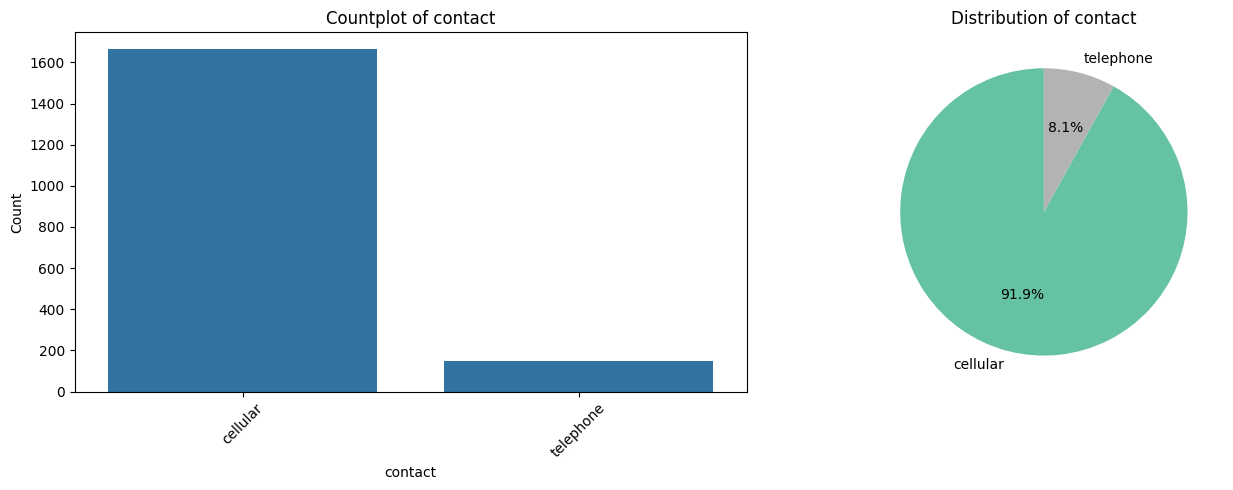

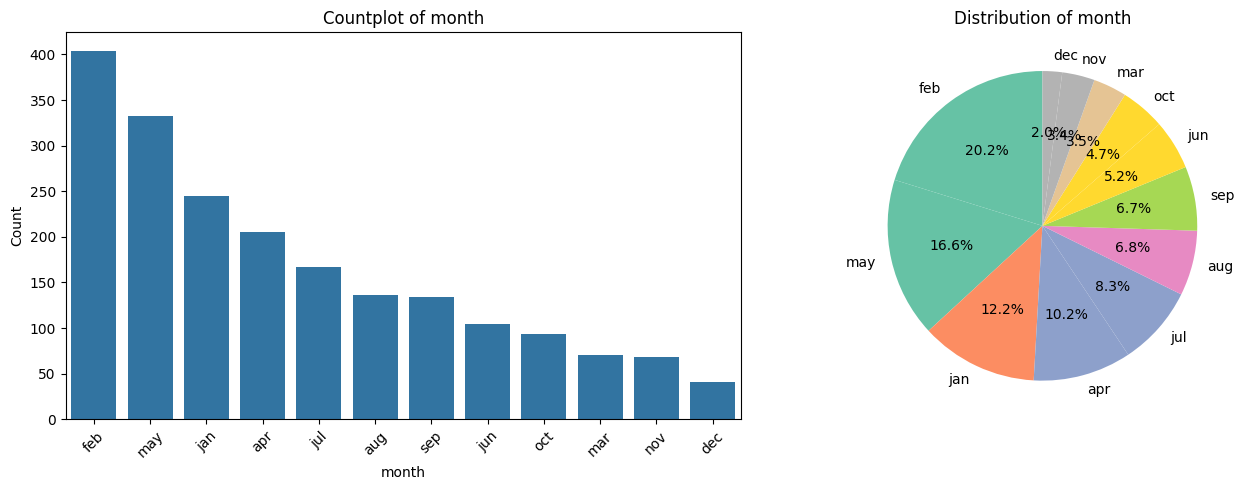

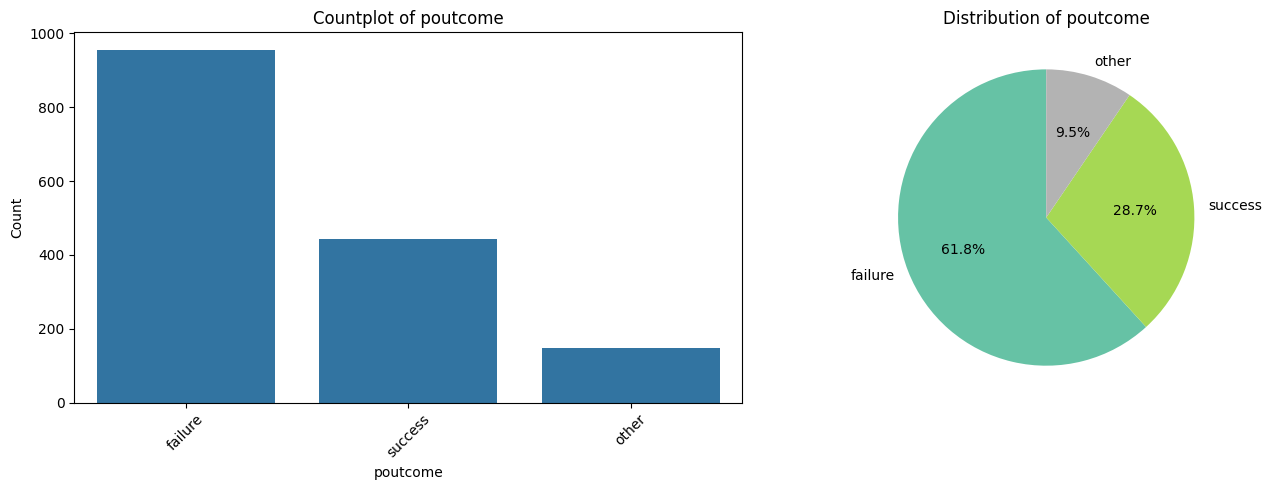

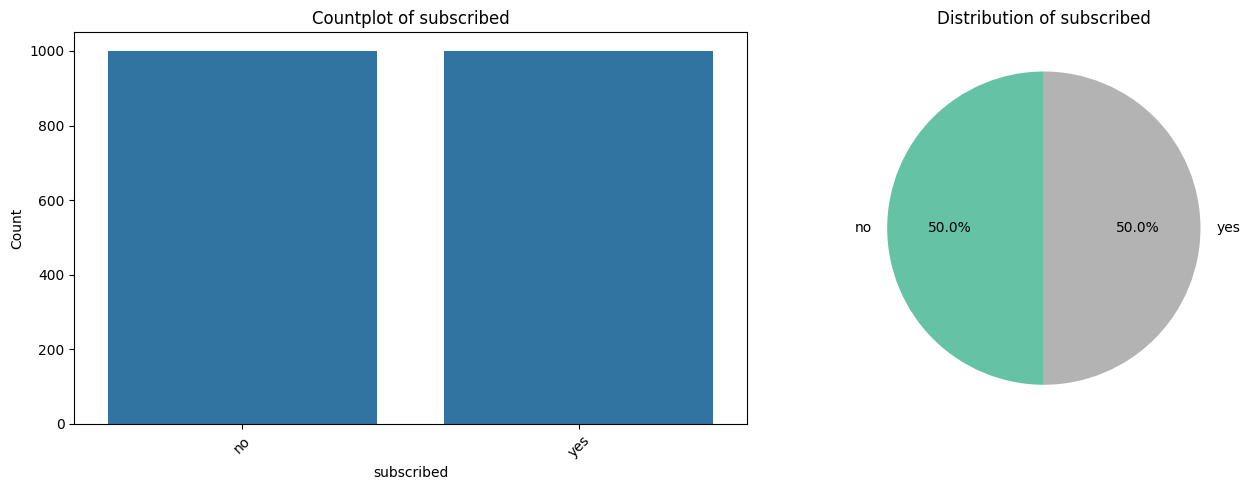

In [11]:
for column in categorical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

    # Countplot
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[0])
    axes[0].set_title(f"Countplot of {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], startangle=90, cmap='Set2')
    axes[1].set_title(f"Distribution of {column}")
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()
